<a href="https://www.analytiksinc.com">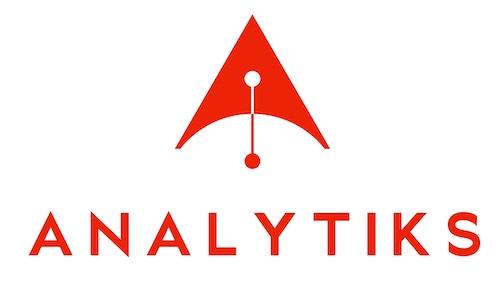</a>
<p style="text-align: right;"> © 2020. Analytiks Inc. </p>

# ENSEMBLE MODEL FOR CREDIT SCORING

<b>Credit Scoring</b><br>
<b>Dataset:</b> <i>crx_proc.csv</i><br>

<b>Target Variable:</b> <i>Target</i> 
* +
* -

<b>Key Objectives:</b>
1. Preprocess the Dataset
    1. Handle Null Values
    2. Convert Categorical Data to Numeric

2. Get the Cross Validated Accuracy Score using the following algorithms:
    1. Logistic Regression
    2. Decision Trees
    3. Random Forest
    4. GBM
    5. Voting Classifier

*Use Pipelines if the model uses multiple steps (i.e. Scaling)*<br>
*Use GridSearchCV or RandomizedSearchCV to optimize your models*

3. Print out models and their resulting CV accuracy scores

## Import Libraries

### Standard Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Load and Explore the Dataset

In [4]:
df = pd.read_csv('../Datasets/crx_proc.csv')
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  Target  690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [6]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


## Preprocess the Dataset

### Remove Null Values

In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      653 non-null    object 
 1   A2      653 non-null    float64
 2   A3      653 non-null    float64
 3   A4      653 non-null    object 
 4   A5      653 non-null    object 
 5   A6      653 non-null    object 
 6   A7      653 non-null    object 
 7   A8      653 non-null    float64
 8   A9      653 non-null    object 
 9   A10     653 non-null    object 
 10  A11     653 non-null    int64  
 11  A12     653 non-null    object 
 12  A13     653 non-null    object 
 13  A14     653 non-null    float64
 14  A15     653 non-null    int64  
 15  Target  653 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.7+ KB


In [8]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


Check Number of Remaining Samples

In [9]:
df.shape

(653, 16)

### Split Features and Target

In [10]:
df_pred = df.drop('Target', axis=1)
df_target = df['Target']

In [11]:
df_pred

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750


In [12]:
df_target

0      +
1      +
2      +
3      +
4      +
      ..
685    -
686    -
687    -
688    -
689    -
Name: Target, Length: 653, dtype: object

### Convert Categorical Data to Numerical

In [13]:
df_pred_dum = pd.get_dummies(df_pred)
df_pred_dum

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1,202.0,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,260.0,0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
686,22.67,0.750,2.00,2,200.0,394,1,0,0,1,...,0,1,0,0,1,0,1,1,0,0
687,25.25,13.500,2.00,1,200.0,1,1,0,0,0,...,0,1,0,0,1,0,1,1,0,0
688,17.92,0.205,0.04,0,280.0,750,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0


## Get the Cross Validated Accuracy Score using the following algorithms:

In [14]:
scaler = MinMaxScaler()

### Logistic Regression

#### Build a Logistic Regression Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, LogisticRegression)
* Get mean cross_val_score (cv=5)

In [15]:
clf = LogisticRegression(random_state=123)

pipe = make_pipeline(scaler, clf)

lr_acc = cross_val_score(pipe, df_pred_dum, df_target).mean()
lr_acc

0.8484204345273048

### Decision Tree

#### Build a Decision Tree Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, DecisionTree)
* Get mean cross_val_score (cv=5)

In [16]:
clf = DecisionTreeClassifier(random_state=123)

pipe = make_pipeline(scaler, clf)

dt_acc = cross_val_score(pipe, df_pred_dum, df_target).mean()
dt_acc

0.8086318261890781

## Ensemble Models

### Random Forest

#### Build a Random Forest Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, RandomForestClassifier)
* Get mean cross_val_score (cv=5)

In [17]:
clf = RandomForestClassifier(random_state=123)

steps = [('scaler', scaler), ('clf', clf)]

pipe = Pipeline(steps)

rf_acc = cross_val_score(pipe, df_pred_dum, df_target).mean()
rf_acc

0.8529301233118026

#### Perform Hyper Parameter Optimization on the Random Forest Classifier
* Choose either Grid Search or Random Search with the following parameters:
    * cv=5
    * iid=False
* Optimize the following parameters:
    * max_depth
    * max_features
    * min_samples_split
    * min_samples_leaf
    * bootstrap
    * criterion
* Get Best Score

Grid Search / Random Search

In [18]:
clf = RandomForestClassifier(random_state=123)

steps = [('scaler', scaler), ('clf', clf)]

pipe = Pipeline(steps)

param_grid = {'clf__max_features': ['auto', 'log2'],
             'clf__min_samples_split': [2],
              'clf__criterion': ['gini', 'entropy']}

grid_pipe = GridSearchCV(pipe, param_grid, iid=False)

In [19]:
model = grid_pipe.fit(df_pred_dum, df_target)

In [20]:
grid_acc = model.best_score_
grid_acc

0.859107457428068

In [21]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__criterion,param_clf__max_features,param_clf__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.156213,0.000001,0.009373,0.007653,entropy,auto,2,"{'clf__criterion': 'entropy', 'clf__max_featur...",0.656489,0.977099,0.946565,0.784615,0.930769,0.859107,0.121087,1
3,0.148204,0.004839,0.012730,0.003592,entropy,log2,2,"{'clf__criterion': 'entropy', 'clf__max_featur...",0.664122,0.969466,0.946565,0.761538,0.938462,0.856031,0.121340,2
0,0.142308,0.002091,0.013559,0.002542,gini,auto,2,"{'clf__criterion': 'gini', 'clf__max_features'...",0.671756,0.984733,0.938931,0.753846,0.915385,0.852930,0.119424,3
1,0.139347,0.004552,0.008779,0.004389,gini,log2,2,"{'clf__criterion': 'gini', 'clf__max_features'...",0.648855,0.961832,0.938931,0.769231,0.923077,0.848385,0.120603,4


### GBM

#### Build a GBM Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, GBM)
* Get mean cross_val_score (cv=5)

In [22]:
clf = GradientBoostingClassifier(random_state=123)

steps = [('scaler', scaler), ('clf', clf)]

pipe = Pipeline(steps)

gbm_acc = cross_val_score(pipe, df_pred_dum, df_target).mean()
gbm_acc

0.8468702290076336

### VOTING

#### Build a Voting Classifier
* Use the following estimators:
    * Logistic Regression
    * Random Forest
    * GBM
* Choose either 'hard' or 'soft' voting
* Use a pipeline (MinMaxScaler, Voting)
* Get mean cross_val_score (cv=5)

Hard Voting / Soft Voting

In [23]:
lr = LogisticRegression(random_state=123)
rf = RandomForestClassifier(random_state=123)
gbm = GradientBoostingClassifier(random_state=123)

estimators = [('lr', lr),('rf', rf),('gbm', gbm)]

clf = VotingClassifier(estimators, voting='soft')

steps = [('scaler', scaler), ('clf', clf)]

pipe = Pipeline(steps)

soft_voting_acc = cross_val_score(pipe, df_pred_dum, df_target).mean()
soft_voting_acc

0.8514386376981797

# Compare Accuracy Across Models

In [24]:
scores = [lr_acc, dt_acc, rf_acc, grid_acc, gbm_acc, soft_voting_acc]

In [25]:
pd.DataFrame(columns=['acc_score'], index=['lr', 'dt', 'rf', 'grid_cv', 'gbm', 'voting'], data=scores) \
.sort_values('acc_score', ascending=False)

,acc_score
grid_cv,0.859107
rf,0.852930
voting,0.851439
lr,0.848420
gbm,0.846870
dt,0.808632
